# 使用 TensorFlow 构建回归模型

本 Notebook 演示如何使用 TensorFlow 构建一个简单的回归模型来拟合目标函数：

$$ f(x)=\sin(x)+0.1x^2 $$

内容包括数据生成、模型构建、训练以及结果可视化。

In [1]:
# 导入必要的库
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

## 定义目标函数及数据生成函数

目标函数定义为：

$$ f(x)=\sin(x)+0.1x^2 $$

同时定义了一个函数 `generate_data` 用于在区间 [-5, 5] 内随机采样生成数据。

In [2]:
# 定义目标函数
def target_func(x):
    return np.sin(x) + 0.1 * (x ** 2)

# 生成训练和测试数据的函数
def generate_data(n):
    # 在 [-5, 5] 区间随机采样
    x = np.random.uniform(-5, 5, size=(n, 1))
    y = target_func(x)
    return x, y

# 生成数据：训练集1000个样本，测试集200个样本（均匀采样用于平滑曲线绘制）
x_train, y_train = generate_data(1000)
x_test = np.linspace(-5, 5, 200).reshape(-1, 1)
y_test = target_func(x_test)

## 构建并编译模型

构建一个两层 ReLU 网络：

- 第一层：64 个神经元，ReLU 激活
- 第二层：输出层，线性激活

使用 Adam 优化器和均方误差损失函数对模型进行编译。

In [3]:
# 构建模型：两层 ReLU 网络
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # 隐藏层：64个单元，ReLU激活
    Dense(1)  # 输出层，线性激活
])

# 编译模型：使用Adam优化器和均方误差损失
model.compile(optimizer='adam', loss='mse')

## 训练模型

使用训练集数据进行模型训练，共训练 100 个 epoch，同时利用测试集数据进行验证。

In [4]:
# 训练模型，100个epoch，使用测试集作为验证集
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)

## 绘制训练和测试损失曲线

训练结束后，绘制训练损失和测试（验证）损失的变化曲线，以便观察模型的收敛情况。

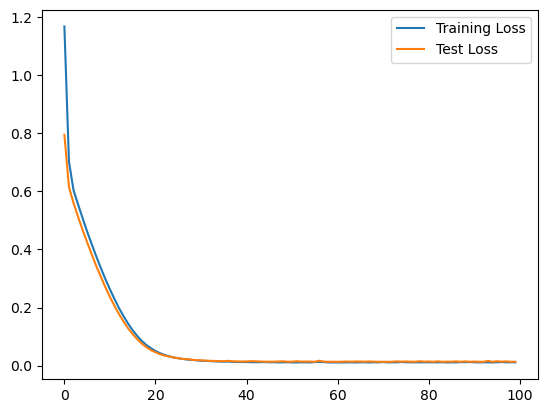

In [5]:
# 绘制训练和测试损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

## 绘制真实函数与模型预测对比

将训练数据、真实的目标函数曲线以及模型预测曲线绘制在一张图中进行比较。

7/7 [==============================] - 0s 973us/step


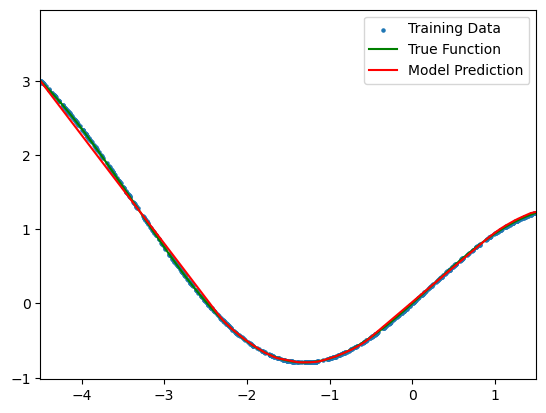

In [6]:
# 绘制真实函数与模型预测对比
plt.scatter(x_train, y_train, s=5, label='Training Data')
plt.plot(x_test, y_test, label='True Function', color='green')
plt.plot(x_test, model.predict(x_test), label='Model Prediction', color='red')
plt.legend()
plt.xlim(-4.5, 1.5)
plt.show()